In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = np.load('Desktop\galaxy_catalogue.npy')

In [3]:
dataset = pd.DataFrame(data)


In [4]:
dataset.head()

,u-g,g-r,r-i,i-z,ecc,m4_u,m4_g,m4_r,m4_i,m4_z,petroR50_u,petroR50_r,petroR50_z,petroR90_u,petroR90_r,petroR90_z,class
0,1.85765,0.67158,0.42310,0.30610,0.585428,2.251946,2.339849,2.380652,2.359738,2.395528,3.095123,3.818919,3.826230,5.174814,8.263009,11.477340,merger
1,1.74259,0.86085,0.44927,0.28851,0.749812,2.031566,2.084156,2.092272,2.124075,2.133154,1.430436,1.422533,1.385727,3.732712,3.416921,3.330347,merger
2,2.10697,0.96710,0.56810,0.33747,0.630089,1.992887,2.450746,2.473116,2.465324,2.438683,3.099957,3.623704,3.463300,9.110857,8.354343,11.265390,merger
3,1.22840,0.60446,0.39049,0.28913,0.668999,2.056115,2.182252,2.309510,2.391414,2.472397,3.627267,4.063471,3.717708,9.580675,12.202420,11.826220,merger
4,1.80792,0.78124,0.45528,0.35067,0.500170,2.259167,2.194723,2.264567,2.334713,2.352568,3.256751,3.153533,2.254511,9.206746,9.790146,6.636931,merger


In [5]:
dataset.shape

(780, 17)

In [6]:
dataset.describe()

,u-g,g-r,r-i,i-z,ecc,m4_u,m4_g,m4_r,m4_i,m4_z,petroR50_u,petroR50_r,petroR50_z,petroR90_u,petroR90_r,petroR90_z
count,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000
mean,1.633556,0.751285,0.390027,0.256630,0.713827,-36.228336,-10.499354,-23.280043,-36.084795,-48.904677,-46.026529,4.897747,-34.147368,-38.642822,12.625589,-27.091879
std,0.680241,0.333986,0.094902,0.434369,0.171010,619.454396,358.104842,506.113635,619.462662,714.833597,715.052758,5.647410,619.598004,715.634265,9.482342,620.075967
min,-8.202350,-4.708600,-0.630590,-7.698340,0.226894,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,0.617535,-9999.000000,-9999.000000,1.031904,-9999.000000
25%,1.333080,0.620432,0.353687,0.227997,0.592427,2.124926,2.238136,2.303345,2.327275,2.329166,2.896251,2.884019,2.553682,7.056056,8.101448,7.145191
50%,1.701755,0.789610,0.400985,0.294780,0.744386,2.269386,2.351759,2.380019,2.394285,2.390121,4.391504,3.929862,3.449929,10.743275,10.509180,9.423079
75%,1.914082,0.905282,0.430363,0.326920,0.852673,2.390789,2.420319,2.439145,2.448875,2.449683,6.148377,5.450743,4.832378,14.975497,14.321407,13.388955
max,10.624040,1.539170,1.390840,4.879330,0.999812,26.009380,2.724017,2.737767,2.728628,2.730472,61.133380,134.394700,89.220090,112.493900,162.428100,116.535700


In [7]:
X = dataset.iloc[:,:10]
y=dataset['class']


In [8]:
y2 =y.copy()

In [9]:
y2 = pd.DataFrame(y2)
y2.shape

(780, 1)

In [10]:
X.shape

(780, 10)

In [11]:
X['conc_u']=(dataset['petroR50_u'])/(dataset['petroR90_u'])

In [12]:
X['conc_r']=dataset['petroR50_r']/dataset['petroR90_r']
X.shape

(780, 12)

In [13]:
X['conc_z']= dataset['petroR50_z']/dataset['petroR90_z']
X.shape

(780, 13)

In [14]:
import seaborn as sns

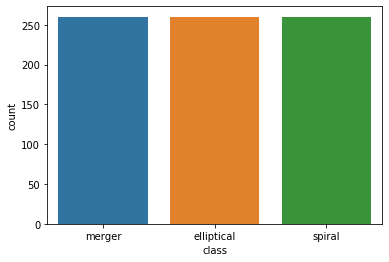

In [15]:
sns.countplot(y)

In [16]:
y[600]

'spiral'

In [17]:
y2.iloc[:,0].head()

0    merger
1    merger
2    merger
3    merger
4    merger
Name: class, dtype: object

In [20]:
from keras.utils.np_utils import to_categorical

In [19]:
y2.head()

,class
0,merger
1,merger
2,merger
3,merger
4,merger


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size = 0.2, random_state = 0)

In [22]:
space = {'merger':0,'elliptical':1,'spiral':2}
y_train = y_train.iloc[:,0].map(space)
y_train = to_categorical(y_train,3)

In [23]:
y_train.shape

(624, 3)

In [24]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [25]:
X_train.shape

(624, 13)

In [26]:
y_train.shape

(624, 3)

In [27]:
y_train[0]

array([1., 0., 0.], dtype=float32)

In [28]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [29]:
# intialising the ann
classifier = Sequential()

#adding input layer,hidden layer
classifier.add(Dense(output_dim = 6, init='uniform' , activation = 'relu' , input_dim= 13))

classifier.add(Dense(output_dim = 32, init='uniform' , activation = 'relu' ))

#adding output layer
classifier.add(Dense(output_dim = 3, init='uniform' , activation = 'softmax'))

D:\anaconda\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  """
D:\anaconda\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=32, kernel_initializer="uniform")`
  import sys
D:\anaconda\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=3, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.


In [30]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 6)                 84        
_________________________________________________________________
dense_2 (Dense)              (None, 32)                224       
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 99        
Total params: 407
Trainable params: 407
Non-trainable params: 0
_________________________________________________________________


In [31]:
classifier.compile(optimizer ='adam' , loss ='categorical_crossentropy',metrics =['accuracy'] )

history=classifier.fit(X_train,y_train,batch_size = 10 ,epochs = 200)


Epoch 1/200
624/624 [==============================] - 1s 2ms/step - loss: 1.0888 - accuracy: 0.4696
Epoch 2/200
624/624 [==============================] - 0s 487us/step - loss: 0.9372 - accuracy: 0.7035
Epoch 3/200
624/624 [==============================] - 0s 361us/step - loss: 0.7380 - accuracy: 0.6955
Epoch 4/200
624/624 [==============================] - 0s 390us/step - loss: 0.6198 - accuracy: 0.7532
Epoch 5/200
624/624 [==============================] - 0s 370us/step - loss: 0.5524 - accuracy: 0.7837
Epoch 6/200
624/624 [==============================] - 0s 447us/step - loss: 0.5133 - accuracy: 0.7997
Epoch 7/200
624/624 [==============================] - 0s 407us/step - loss: 0.4880 - accuracy: 0.8077
Epoch 8/200
624/624 [==============================] - 0s 345us/step - loss: 0.4735 - accuracy: 0.8141
Epoch 9/200
624/624 [==============================] - 0s 361us/step - loss: 0.4652 - accuracy: 0.8157
Epoch 10/200
624/624 [==============================] - 0s 386us/step - lo

In [32]:
y_pred = classifier.predict(X_test)

In [33]:
y_pred = np.argmax(y_pred,axis=1)

In [34]:
y_pred

array([2, 1, 0, 0, 1, 1, 2, 0, 0, 2, 0, 1, 2, 2, 0, 2, 1, 1, 2, 1, 2, 0,
       1, 2, 0, 2, 2, 2, 2, 2, 0, 1, 2, 2, 1, 1, 0, 1, 2, 0, 1, 2, 1, 0,
       0, 1, 2, 1, 1, 2, 1, 1, 1, 2, 0, 1, 1, 0, 0, 1, 0, 1, 0, 2, 0, 1,
       1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 1, 2, 2,
       2, 1, 1, 0, 0, 1, 2, 0, 1, 0, 0, 2, 2, 0, 0, 2, 1, 1, 0, 0, 0, 0,
       2, 2, 1, 1, 0, 0, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 0, 2, 2, 1,
       1, 1, 2, 1, 0, 1, 0, 0, 0, 0, 0, 2, 1, 1, 0, 2, 1, 0, 2, 0, 1, 0,
       1, 1], dtype=int64)

In [35]:
space = {'merger':0,'elliptical':1,'spiral':2}
y_test = y_test.iloc[:,0].map(space)
y_test.head

<bound method NDFrame.head of 699    2
327    1
210    0
14     0
413    1
428    1
585    2
561    2
214    0
630    2
31     0
434    1
644    2
665    2
103    0
592    2
306    1
432    1
222    0
419    1
650    2
175    0
312    1
698    2
27     0
605    2
531    2
749    2
689    2
534    2
      ..
255    0
489    1
204    0
737    2
706    2
196    0
500    1
390    1
718    2
71     0
49     0
266    1
142    0
535    2
37     0
231    0
48     0
546    2
317    1
346    1
751    2
647    2
76     0
64     0
620    2
52     0
318    1
602    2
494    1
352    1
Name: class, Length: 156, dtype: int64>

In [36]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[36,  6,  6],
       [ 2, 50,  1],
       [ 7,  0, 48]], dtype=int64)

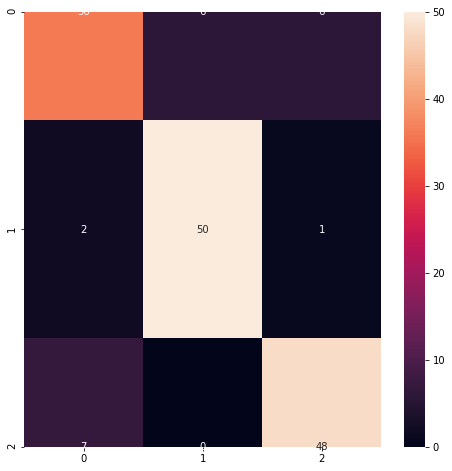

In [37]:
plt.figure(figsize = (8,8))
sns.heatmap(cm,annot = True)

In [38]:
accuracy = history.history['accuracy']
loss = history.history['loss']

In [39]:
y_test = to_categorical(y_test,3)

score = classifier.evaluate(X_test,y_test)
print('test acc :{}'.format(score[1]))

156/156 [==============================] - 0s 1ms/step
test acc :0.8589743375778198
